In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
cpi=pd.read_excel("./Datasets/tuketici fiyat endeksi (2003=100).xls")
#print(cpi[cpi['Tüketici fiyat endeks rakamları (2003=100)']=='Annual rate of change (%)'])
#print(cpi.iloc[76:98])
inflation=cpi.iloc[79:98]
inflation=pd.DataFrame(inflation)


In [2]:


inflation = inflation.set_axis(["Yil","Ocak","Şubat","Mart","Nisan","Mayis","Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasim","Aralik"], axis=1, inplace=False)
inflation

,Yil,Ocak,Şubat,Mart,Nisan,Mayis,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasim,Aralik
79,2004,10.59,9.48,8.4,7.87,7.31,7.08,7.79,8.45,8.01,9.43,9.47,9.35
80,2005,9.23,8.69,7.94,8.18,8.7,8.95,7.82,7.91,7.99,7.52,7.61,7.72
81,2006,7.93,8.15,8.16,8.83,9.86,10.12,11.69,10.26,10.55,9.98,9.86,9.65
82,2007,9.93,10.16,10.86,10.72,9.23,8.6,6.9,7.39,7.12,7.7,8.4,8.39
83,2008,8.17,9.1,9.15,9.66,10.74,10.61,12.06,11.77,11.13,11.99,10.76,10.06
84,2009,9.5,7.73,7.89,6.13,5.24,5.73,5.39,5.33,5.27,5.08,5.53,6.53
85,2010,8.19,10.13,9.56,10.19,9.1,8.37,7.58,8.33,9.24,8.62,7.29,6.4
86,2011,4.9,4.16,3.99,4.26,7.17,6.24,6.31,6.65,6.15,7.66,9.48,10.45
87,2012,10.61,10.43,10.43,11.14,8.28,8.87,9.07,8.88,9.19,7.8,6.37,6.16
88,2013,7.31,7.03,7.29,6.13,6.51,8.3,8.88,8.17,7.88,7.71,7.32,7.4


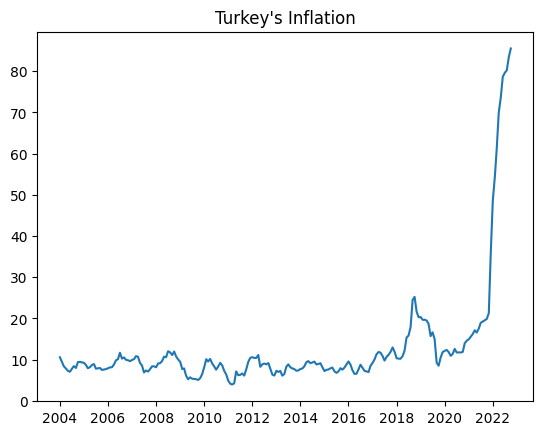

In [3]:
dates=pd.date_range('2004-01-01','2023-01-01' , freq='1M')-pd.offsets.MonthBegin(1)
df=pd.DataFrame()
del inflation["Yil"]
v=np.array(inflation.values)
v=v.flatten()
df["Inflation"]=v
df=df.set_index(dates)
plt.figure()
plt.title("Turkey's Inflation")

plt.plot(df)
plt.show()


In [4]:
currency=pd.read_csv("./Datasets/USD_TRY Geçmiş Verileri.csv")
currency

,Tarih,Şimdi,Açılış,Yüksek,Düşük,Hac.,Fark %
0,01.01.2004,"1,3410","1,4035","1,4045","1,3090",NaN,"-4,39%"
1,01.02.2004,"1,3270","1,3380","1,3630","1,3020",NaN,"-1,04%"
2,01.03.2004,"1,3135","1,3265","1,3375","1,3070",NaN,"-1,02%"
3,01.04.2004,"1,4206","1,3106","1,4576","1,3036",NaN,"8,15%"
4,01.05.2004,"1,4895","1,4185","1,5755","1,4125",NaN,"4,85%"
...,...,...,...,...,...,...,...
222,01.07.2022,"17,9114","16,6968","18,0470","16,5898",NaN,"7,30%"
223,01.08.2022,"18,1868","17,9084","18,3530","17,6443",NaN,"1,54%"
224,01.09.2022,"18,5000","18,1976","18,6262","18,0980",NaN,"1,72%"
225,01.10.2022,"18,5920","18,4895","18,7200","18,3515",NaN,"0,50%"


In [5]:
df1=pd.DataFrame()
df1["USD/TL"]=currency["Şimdi"]
df1=df1.applymap(lambda x: str(x.replace(',','.')))
df1["USD/TL"]=df1["USD/TL"].astype(float)


In [6]:
dates= pd.date_range('2004-01-01','2022-12-01' , freq='1M')-pd.offsets.MonthBegin(1)

            
df1=df1.set_index(dates)
df1


,USD/TL
2004-01-01,1.3410
2004-02-01,1.3270
2004-03-01,1.3135
2004-04-01,1.4206
2004-05-01,1.4895
...,...
2022-07-01,17.9114
2022-08-01,18.1868
2022-09-01,18.5000
2022-10-01,18.5920


<AxesSubplot:>

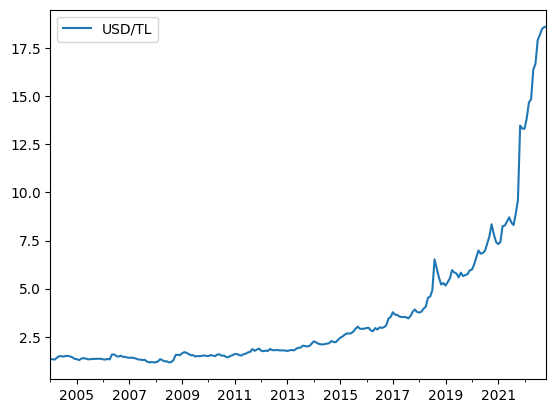

In [7]:
df1.plot()

In [9]:
money_supply=pd.read_excel("./Datasets/EVDS.xlsx")
del money_supply['Unnamed: 2']
money_supply.columns={"Tarih","Para Arzi(Trilyon TL)"}
money_supply = money_supply.dropna(axis=0)
#Monthly money supply
money_supply=money_supply.drop([230,233])
money_supply["Para Arzi(Trilyon TL)"]=money_supply["Para Arzi(Trilyon TL)"]/1e+9
money_supply



,Tarih,Para Arzi(Trilyon TL)
23,2005-12,0.237949
24,2006-01,0.237353
25,2006-02,0.242389
26,2006-03,0.249486
27,2006-04,0.252192
...,...,...
222,2022-07,6.970334
223,2022-08,7.252514
224,2022-09,7.48966
225,2022-10,7.778385


In [10]:
dates=pd.date_range('2005-12-01','2022-12-01' , freq='1M')-pd.offsets.MonthBegin(1)
del money_supply["Tarih"]
money_supply

,Para Arzi(Trilyon TL)
23,0.237949
24,0.237353
25,0.242389
26,0.249486
27,0.252192
...,...
222,6.970334
223,7.252514
224,7.48966
225,7.778385


In [11]:
money_supply=money_supply.set_index(dates)
money_supply

,Para Arzi(Trilyon TL)
2005-12-01,0.237949
2006-01-01,0.237353
2006-02-01,0.242389
2006-03-01,0.249486
2006-04-01,0.252192
...,...
2022-07-01,6.970334
2022-08-01,7.252514
2022-09-01,7.48966
2022-10-01,7.778385


<AxesSubplot:>

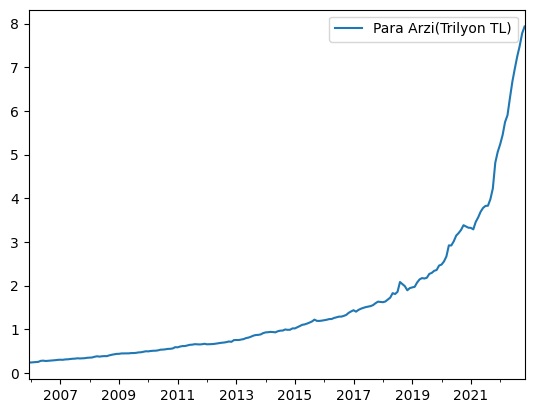

In [12]:
money_supply.plot()

In [13]:
interest=pd.read_excel("./Datasets/TCMB Ortalama Fonlama Faizi ve Toplam Fonlama Miktar__.xlsx")
del interest['Unnamed: 2']
interest=pd.DataFrame(interest.iloc[:142])
interest

,Tarih,TP APIFON4
0,2011-01,6.25
1,2011-02,6.25
2,2011-03,6.25
3,2011-04,6.25
4,2011-05,6.25
...,...,...
137,2022-06,14.05
138,2022-07,14
139,2022-08,13
140,2022-09,12.04


In [14]:
del interest["Tarih"]
interest.columns={"Faiz"}
interest

,Faiz
0,6.25
1,6.25
2,6.25
3,6.25
4,6.25
...,...
137,14.05
138,14
139,13
140,12.04


In [15]:
dates=pd.date_range('2011-01-01','2022-11-01' , freq='1M')-pd.offsets.MonthBegin(1)
interest=interest.set_index(dates)
interest

,Faiz
2011-01-01,6.25
2011-02-01,6.25
2011-03-01,6.25
2011-04-01,6.25
2011-05-01,6.25
...,...
2022-06-01,14.05
2022-07-01,14
2022-08-01,13
2022-09-01,12.04


<AxesSubplot:>

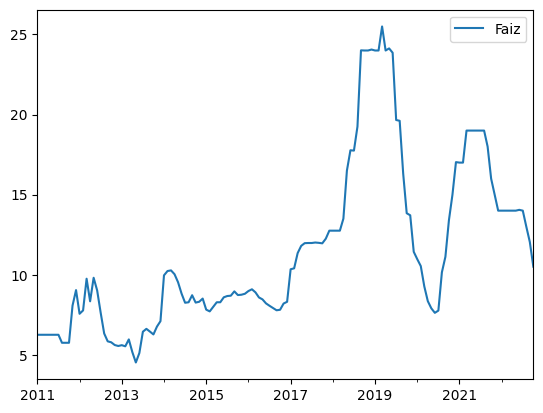

In [22]:
interest.plot()

Since the common start date of all datasets is 2011/01/01, we need to start each dataset from that date.

In [23]:
y = df.iloc[84:226]
y=np.array(y)
kur=np.array(df1.iloc[84:226])
para_arzi=np.array(money_supply.iloc[61:203])
faiz=np.array(pd.DataFrame(interest["Faiz"]))



import wbgapi as wb
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
para_arzi=para_arzi.astype(float)
faiz=faiz.astype(float)
X = np.concatenate((kur,para_arzi,faiz), axis=1)
y=y.astype(float)





In [24]:
XX = sm.add_constant(X)
Y = y
model = sm.OLS(Y,XX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     265.5
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           4.18e-57
Time:                        21:44:48   Log-Likelihood:                -463.74
No. Observations:                 142   AIC:                             935.5
Df Residuals:                     138   BIC:                             947.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6767      1.350      1.242      0.2

Linear Regression score is %84.9